This notebook is used the Stack Overflow Annual Developer Survey in 2020 (https://insights.stackoverflow.com/survey)
The purpose of this notebook is to define and anwser 3 real world questions that are different than the example blog post from Josh Bernhard (https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711), which used 2017 data. Josh questions as below
      How to break into the field ?
      How do the different method related to salary and job satisfaction ?
      What biases did the respondents have in suggesting different methods ?
My plan for this notebook is to answer the below questions about United State Developers:
       What company type offer the highest pay ?
       what is the relationship of working remotely and salary ?
       Does big companies offer higher salary for the same job ?
       What are the top 3 skills for hardward and software engineers ?

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# control font
sns.set_context('talk')

df = pd.read_csv('./survey_results_public.csv')
pd.set_option("max_columns", None)
#pd.set_option("max_colwidth", None)
df.head(5)


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [71]:
# get usa data frame
dfUSA = df.loc[df['Country']=="United States",  ['Salary', 'HomeRemote','CompanyType','YearsProgram', 'FormalEducation','EmploymentStatus']]
dfUSA = dfUSA.dropna()
dfUSA.head()

,Salary,HomeRemote,CompanyType,YearsProgram,FormalEducation,EmploymentStatus
17,130000.0,All or almost all the time (I'm full-time remote),Publicly-traded corporation,20 or more years,Bachelor's degree,Employed full-time
18,82500.0,A few days each month,Publicly-traded corporation,2 to 3 years,Bachelor's degree,Employed full-time
25,175000.0,"Less than half the time, but at least one day ...",Publicly-traded corporation,20 or more years,Master's degree,Employed full-time
70,65000.0,A few days each month,"Privately-held limited company, not in startup...",2 to 3 years,Some college/university study without earning ...,Employed full-time
72,120000.0,All or almost all the time (I'm full-time remote),Venture-funded startup,20 or more years,Some college/university study without earning ...,Employed full-time


# What company type offer the highest pay?

In [72]:
# clean up
serExclude = ["I don't know","I prefer not to answer","Something else"]
dfValidCompanies = dfUSA[~dfUSA['CompanyType'].isin(serExclude)]
dfCompanies = dfValidCompanies.groupby("CompanyType")['Salary'].max().sort_values(ascending=False)
dfCompanies.head()

CompanyType
Privately-held limited company, not in startup mode                      197000.0
Venture-funded startup                                                   195000.0
Publicly-traded corporation                                              195000.0
Pre-series A startup                                                     195000.0
Non-profit/non-governmental organization or private school/university    185000.0
Name: Salary, dtype: float64

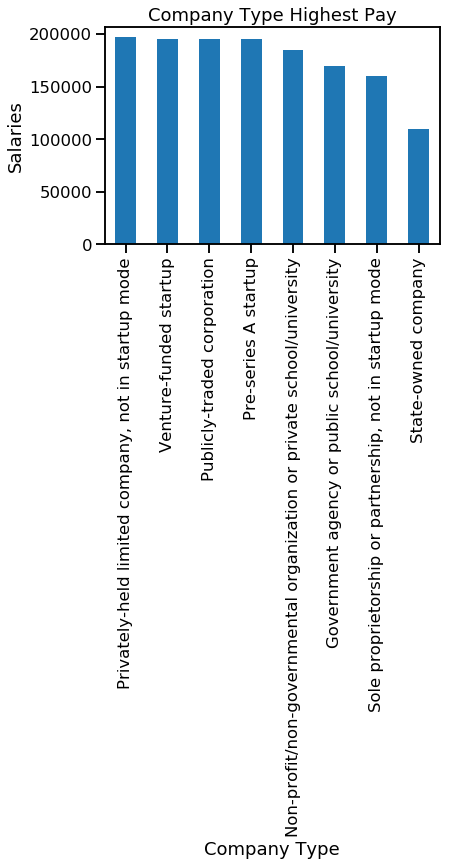

In [73]:
dfCompanies.plot(kind='bar',x='CompanyType',y='Salary')

plt.ylabel('Salaries')
plt.xlabel('Company Type')
plt.title('Company Type Highest Pay')
plt.show()

# what is the relationship of working remotely and salary?

In [74]:
dfRemote = dfUSA.loc[dfUSA['HomeRemote'] != "Never",['HomeRemote','Salary']]
dfRemote = dfRemote.groupby("HomeRemote")['Salary'].mean().sort_values(ascending=False)
dfRemote.head(5)



HomeRemote
All or almost all the time (I'm full-time remote)          108024.191585
Less than half the time, but at least one day each week    102635.631250
More than half, but not all, the time                      100468.111111
About half the time                                         99272.509259
A few days each month                                       97419.584227
Name: Salary, dtype: float64

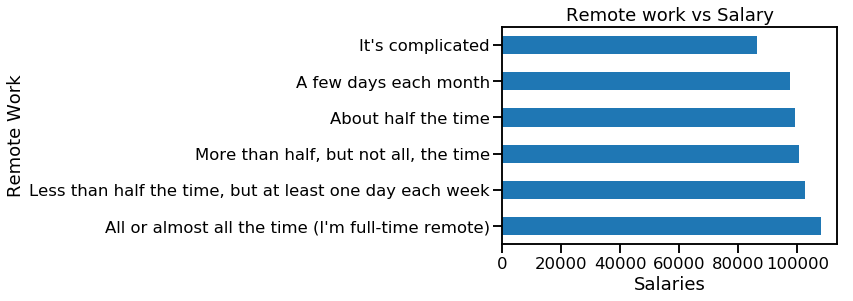

In [75]:

dfRemote.plot(kind='barh',x='HomeRemote',y='Salary')
plt.xlabel('Salaries')
plt.ylabel('Remote Work')
plt.title('Remote work vs Salary')
plt.show()


In [76]:
# Clustered Bar Chart by Company type and experience



In [77]:
# get the exoerience information
# group by company and experience then get the avg salary
# unstack the results to move the experience as columns to create the series
experience = dfValidCompanies.groupby(["CompanyType","YearsProgram"])['Salary'].mean().rename("Salary").sort_values(ascending=False).sort_index().unstack()
experience.head()


YearsProgram,1 to 2 years,10 to 11 years,11 to 12 years,12 to 13 years,13 to 14 years,14 to 15 years,15 to 16 years,16 to 17 years,17 to 18 years,18 to 19 years,19 to 20 years,2 to 3 years,20 or more years,3 to 4 years,4 to 5 years,5 to 6 years,6 to 7 years,7 to 8 years,8 to 9 years,9 to 10 years,Less than a year
CompanyType,,,,,,,,,,,,,,,,,,,,,
Government agency or public school/university,68000.000000,48477.750000,73300.000000,79107.142857,76000.000000,78285.000000,79400.000000,83440.000000,93762.333333,82000.000000,68822.500000,46336.666667,91330.176471,67187.500000,61484.333333,58950.000000,65627.555556,53142.857143,68000.000000,63140.000000,50000.0
Non-profit/non-governmental organization or private school/university,24335.000000,79271.428571,94562.500000,69500.000000,86600.000000,72537.500000,72800.000000,104800.000000,105187.500000,110000.000000,105041.666667,57000.000000,102526.361702,55132.000000,67450.000000,63333.333333,87000.000000,81880.000000,83000.000000,66200.000000,NaN
Pre-series A startup,72400.000000,79166.666667,70000.000000,62880.000000,80000.000000,98000.000000,115000.000000,115000.000000,105500.000000,80000.000000,110000.000000,57000.000000,119562.500000,100500.000000,93000.000000,67250.000000,72571.428571,90000.000000,110000.000000,74333.333333,NaN
"Privately-held limited company, not in startup mode",65970.000000,87153.846154,92121.375000,84254.581395,88584.615385,102602.676471,98192.290909,100608.571429,99781.589744,101083.375000,108830.952381,67173.170732,115981.644079,68700.457386,69900.735294,74513.493333,77069.298246,78856.603774,75864.684211,80515.095238,62625.0
Publicly-traded corporation,91927.272727,101196.953488,105486.842105,106951.638889,116151.612903,104248.070175,112597.777778,111075.000000,124010.666667,115875.583333,122786.486486,77788.888889,125780.827988,81207.692308,80164.489796,82274.576271,95505.568182,92380.487805,93521.404762,96875.138462,57500.0


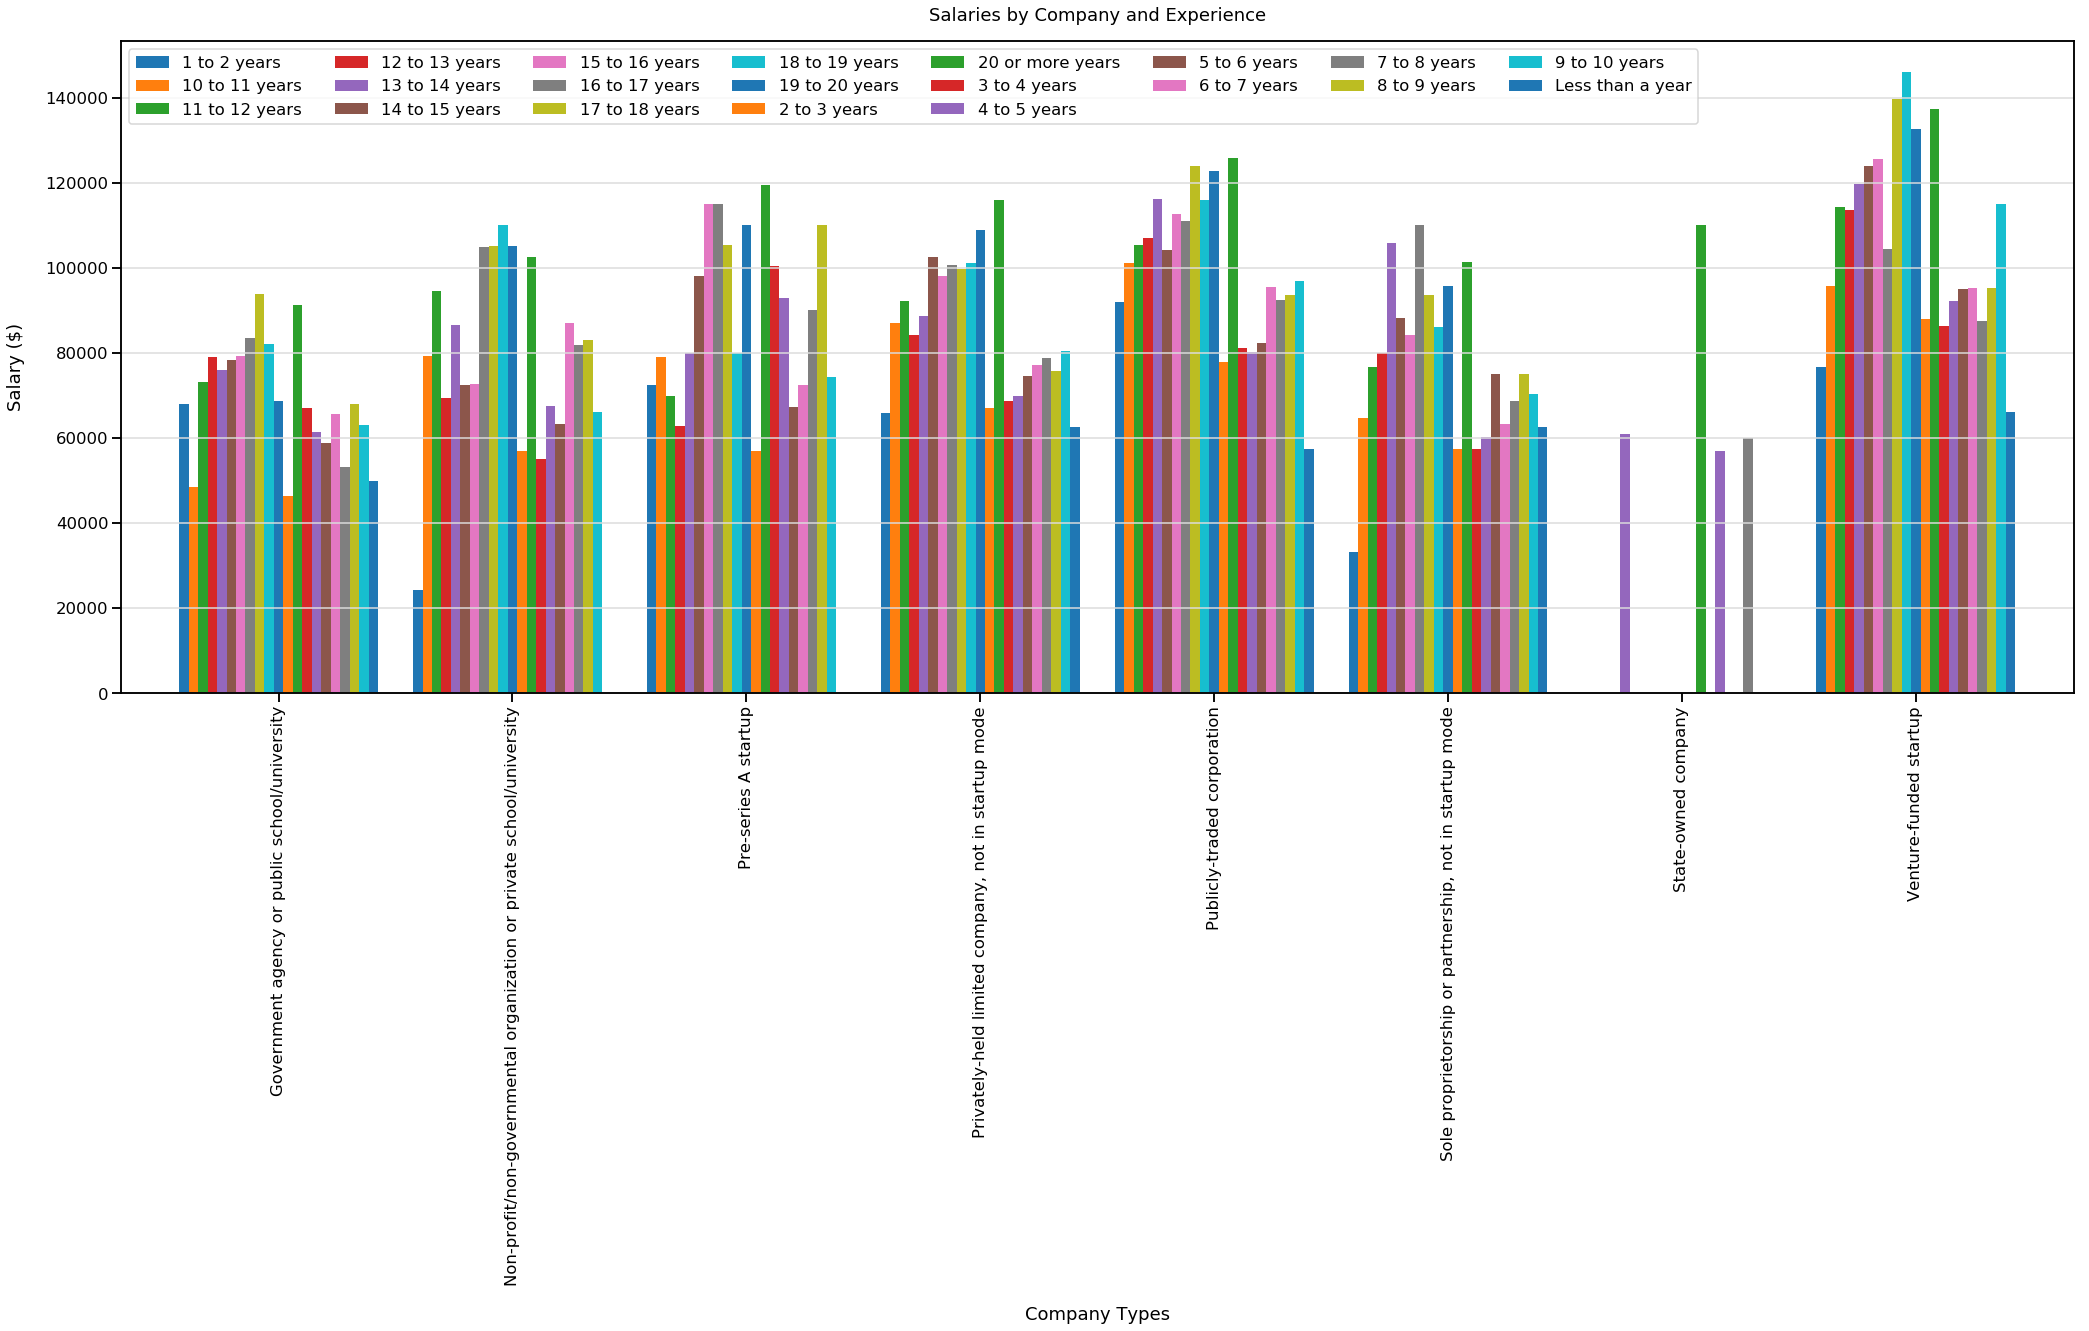

In [85]:
# create the clusterd chart
sns.set_context('talk')
plot = experience.plot.bar(figsize=(35, 12), width=.85)
plot.legend(loc="top",ncol=len(experience))
plot.set_xlabel('Company Types', labelpad=20)
plot.set_ylabel('Salary ($)', labelpad=20)
plot.set_title('Salaries by Company and Experience', pad=20)
plot.yaxis.grid(True, color='#DCDCDC')
plot.xaxis.grid(False)
